##1. Lista de librerias

In [ ]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd
import numpy as np
import random
import warnings
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error, r2_score
from sklearn.utils import check_array
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder

random.seed(13)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##2 Funciones

In [ ]:
%run '/content/drive/MyDrive/Colab Notebooks/Tesis_Functions.ipynb'

balancear_datos Loaded
Selectkbest_features Loaded
rfe_features Loaded
Integración de Variables Loaded
evaluacion de los modelos Loaded
Pca_components Loaded
Improtancia con XGBoost y Random forest Loaded
Random Forest Loaded
quitar_tildes Loaded
completar_datos_serie_tiempo Loaded
eliminar_filas_nan Loaded
cambiar_numeros_menores Loaded
normalize_variables Loaded
calcular_crecimiento_ingresos Loaded
obtener_variables_correlacionadas Loaded
generar_componentes_principales Loaded
rfe_with_elasticnet Loaded
calcular_crecimiento_promedio_por_categoria_Predial Loaded
categorizar_por_boxplot Loaded
calcular_crecimiento_promedio_por_categoria Loaded
limitar_atipicos Loaded
crear_dummies Loaded


##3 Generacion de variables relevantes

###3.1. Carga de datos

In [ ]:
#Carga de la Base 0
Base_0 = pd.read_csv('/content/drive/My Drive/4_Proyect_Final/1_Datos/df_unido_Normalizada_sin_corr.csv')

<ipython-input-6-f0ff08437131>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


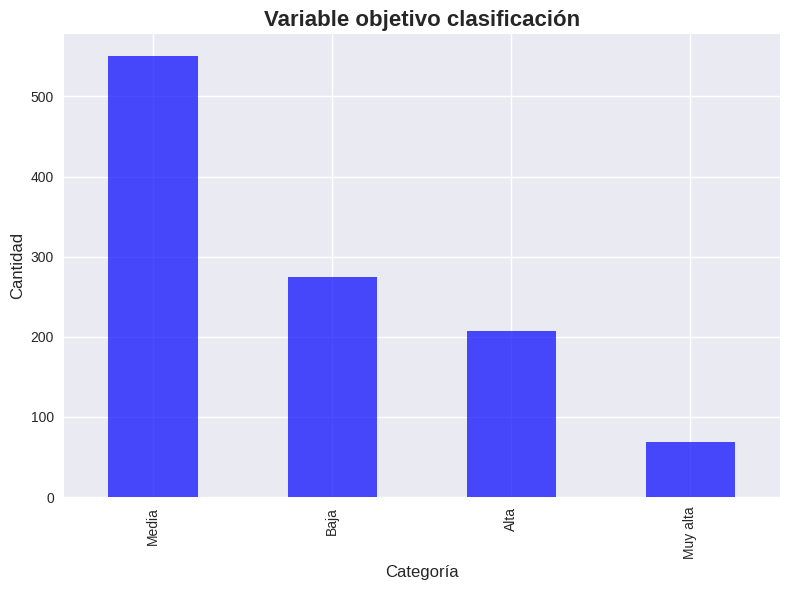

In [ ]:
# Distribución de la Variable Obejtivo

# Contar la cantidad de cada categoría en la columna "categoria"
conteo_categorias = Base_0['recomendacion'].value_counts()
plt.style.use('seaborn')
plt.figure(figsize=(8, 6))
# Generar el gráfico de barras
conteo_categorias.plot(kind='bar', color='blue', alpha=0.7)
# Configurar el título y etiquetas del gráfico
plt.title('Variable objetivo clasificación', fontsize=16, fontweight='bold')
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
#Convertir varable objetivo en numerica
# Instanciar el LabelEncoder
label_encoder = LabelEncoder()

# Codificar la variable objetivo 'Clase' de palabras a números
Base_0['Y_Objetivo'] = label_encoder.fit_transform(Base_0['recomendacion'])

In [ ]:
Base_0.head()

,Id_Municipio_Dane,Nombre_Municipio,Id_Departamento_Dane,Nombre_Departamento,Predial,recomendacion,IPS_Nivel_2,IPS_Departamental,IPS_Indigena,IPS_Mixta,...,Componente_Principal_1403,Componente_Principal_1404,Componente_Principal_1443,Componente_Principal_1445,Componente_Principal_1479,Componente_Principal_1481,Componente_Principal_1490,Componente_Principal_1502,Componente_Principal_1513,Y_Objetivo
0,5001,Medellin,5,Antioquia,133.859412,Media,0.5,0.75,0.0,0.5,...,-0.013679,-0.340778,-0.036618,-0.001457,-0.002975,-0.001974,-0.001092,-0.002192,-0.002082,2
1,5002,Abejorral,5,Antioquia,104.386980,Media,0.0,0.00,0.0,0.0,...,-0.002513,-0.001600,-0.048794,0.382446,-0.002975,-0.001974,-0.001092,-0.002192,-0.003503,2
2,5004,Abriaqui,5,Antioquia,70.358744,Media,0.0,0.00,0.0,0.0,...,-0.002513,-0.001600,-0.015599,-0.028392,-0.002975,-0.001974,-0.001092,-0.002192,-0.003049,2
3,5021,Alejandria,5,Antioquia,212.680226,Media,0.0,0.00,0.0,0.0,...,-0.002513,-0.001600,-0.015599,-0.028392,-0.002975,-0.001974,-0.001092,-0.002192,-0.002480,2
4,5030,Amaga,5,Antioquia,192.535616,Media,0.0,0.00,0.0,0.0,...,-0.002513,-0.001600,-0.035488,0.274239,-0.002975,-0.001974,-0.001092,-0.002192,-0.001673,2


###3.2. Selección de Variables con Selectkbest

In [ ]:
columnas_a_eliminar = ['Id_Municipio_Dane','Nombre_Municipio','Id_Departamento_Dane','Nombre_Departamento','Predial','recomendacion','Y_Objetivo']
Base_0_X=Base_0.drop(columnas_a_eliminar, axis=1)
Base_0_Y=pd.DataFrame(Base_0['Y_Objetivo'])
y=np.ravel(Base_0_Y.values)
Id_Municipio_Dane=Base_0[['Id_Municipio_Dane','recomendacion','Y_Objetivo']]

In [ ]:
Varaibles_Selectkbest=Selectkbest_features(Base_0_X, y, Base_0_X.shape[1],f_classif)

#Calcular la suma total de la columna
suma_total = Varaibles_Selectkbest['Puntuacion'].sum()

# Normalizar los valores para que sumen 100%
Varaibles_Selectkbest['Importance_Selectkbest'] = (Varaibles_Selectkbest['Puntuacion'] / suma_total)

In [ ]:
Varaibles_Selectkbest.head()

,Variable,Puntuacion,Importance_Selectkbest
0,IPS_Nivel_2,0.935254,0.000746
1,IPS_Departamental,0.142002,0.000113
2,IPS_Indigena,7.251042,0.005786
3,IPS_Mixta,0.235478,0.000188
4,Agricultura_Acelga,0.000000,0.000000


###3.4. Selección de Variables RFE

In [ ]:
varibales_rfe=select_features_with_rfe_Clasisification(Base_0_X, y, Base_0_X.shape[1])
varibales_rfe['Importance'] = varibales_rfe['Importance'].abs()
#Calcular la suma total de la columna
suma_total = varibales_rfe['Importance'].sum()
# Normalizar los valores para que sumen 100%
varibales_rfe['Importance_ElasticNet'] = (varibales_rfe['Importance'] / suma_total)

In [ ]:
varibales_rfe.head()

,Variable,Importance,Importance_ElasticNet
0,IPS_Nivel_2,0.537444,0.002551
1,IPS_Departamental,0.215389,0.001023
2,IPS_Indigena,0.194213,0.000922
3,IPS_Mixta,0.356744,0.001694
4,Agricultura_Acelga,0.000000,0.000000


###3.5. Selección de Variables XGBoost

In [ ]:
varibales_rfe_XGBOOST=find_important_variables_Clasificacion(Base_0_X, Base_0_Y, 'xgboost', n_estimators=100)
varibales_rfe_XGBOOST = varibales_rfe_XGBOOST.rename(columns={'Importance': 'Importance_XGBoost'})

###3.6. Selección de Variables Random Forest

In [ ]:
varibales_rfe_RandomForest=find_important_variables_Clasificacion(Base_0_X, Base_0_Y, 'random_forest', n_estimators=100)
varibales_rfe_RandomForest = varibales_rfe_RandomForest.rename(columns={'Importance': 'Importance_RandomForest'})

<ipython-input-4-4271c4755eed>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


###3.7. integración de variables

In [ ]:
Var_concat=Varaibles_Selectkbest.merge(varibales_rfe, left_on='Variable', right_on='Variable', how='left')
Var_concat=Var_concat.merge(varibales_rfe_XGBOOST, on='Variable', how='left')
Var_concat=Var_concat.merge(varibales_rfe_RandomForest, on='Variable', how='left')
Var_concat=Var_concat[['Variable','Importance_Selectkbest','Importance_ElasticNet','Importance_XGBoost','Importance_RandomForest']]

In [ ]:
Var_concat.head()

,Variable,Importance_Selectkbest,Importance_ElasticNet,Importance_XGBoost,Importance_RandomForest
0,IPS_Nivel_2,0.000746,0.002551,0.004885,0.000000
1,IPS_Departamental,0.000113,0.001023,0.001838,0.000000
2,IPS_Indigena,0.005786,0.000922,0.008121,0.000283
3,IPS_Mixta,0.000188,0.001694,0.000000,0.000057
4,Agricultura_Acelga,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Calcular la suma de las columnas
Var_concat['Suma_Importances'] = Var_concat[['Importance_Selectkbest', 'Importance_ElasticNet', 'Importance_XGBoost', 'Importance_RandomForest']].sum(axis=1)
#Calcular la suma total de la columna
suma_total = Var_concat['Suma_Importances'].sum()
# Normalizar los valores para que sumen 100%
Var_concat['Total_imp'] = (Var_concat['Suma_Importances'] / suma_total)
#Var_concat=Var_concat[['Variable','Total_imp']]


In [ ]:
Var_concat.head()

,Variable,Importance_Selectkbest,Importance_ElasticNet,Importance_XGBoost,Importance_RandomForest,Suma_Importances,Total_imp
0,IPS_Nivel_2,0.000746,0.002551,0.004885,0.000000,0.008183,0.002046
1,IPS_Departamental,0.000113,0.001023,0.001838,0.000000,0.002974,0.000743
2,IPS_Indigena,0.005786,0.000922,0.008121,0.000283,0.015112,0.003778
3,IPS_Mixta,0.000188,0.001694,0.000000,0.000057,0.001939,0.000485
4,Agricultura_Acelga,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/Variables_Importantes_selector_Clasificacion.csv'
Var_concat.to_csv(ruta_archivo, index=False)

In [ ]:
# Ordenar la columna en orden descendente
df_sorted = Var_concat.sort_values(by='Total_imp', ascending=False)
df_sorted=df_sorted.reset_index(drop=True)
# Calcular el porcentaje acumulado
porcentaje_acumulado = df_sorted['Total_imp'].cumsum() / df_sorted['Total_imp'].sum()

# Encontrar el índice que cumple con el umbral del 80%
indice_umbral = (porcentaje_acumulado >= 0.9).idxmax()

# Filtrar los datos hasta el índice umbral para obtener los datos de Pareto
datos_pareto = df_sorted.iloc[:indice_umbral + 1]



In [ ]:
datos_pareto.head()

,Variable,Importance_Selectkbest,Importance_ElasticNet,Importance_XGBoost,Importance_RandomForest,Suma_Importances,Total_imp
0,Componente_Principal_1140,0.004209,0.000172,0.009480,0.039066,0.052926,0.013232
1,seg_fluvial_ArmasIncautadas,0.011647,0.002732,0.011494,0.000478,0.026350,0.006588
2,Probreza_Inadecuada eliminación de excretas_,0.010260,0.005658,0.002309,0.001707,0.019935,0.004984
3,Componente_Principal_1360,0.014206,0.001351,0.000384,0.002554,0.018495,0.004624
4,Censo_porc_pob_hombres_20_24,0.001931,0.000897,0.013526,0.001240,0.017594,0.004398


In [ ]:
#Creación del data set input con variables relevantes
Columnas_relevantes=datos_pareto['Variable'].values
df_Train=Base_0_X[Columnas_relevantes]


In [ ]:
df_Train.head()

,Componente_Principal_1140,Componente_Principal_600,Componente_Principal_1253,Economia_Rendimiento_Malanga,Educacion_Cobertura_Neta_Transición,Mercado_Laboral_participacion_trabajadores_cotizantes_sin_reporte_edad,Economia_Rendimiento_Arroz,salud_PorcNacVivosMadres1826,Probreza_Inadecuada eliminación de excretas_,IPS_Indigena,...,Componente_Principal_1443,salud_TasaMortAccTranspTerrestreMujeres,Economia_Rendimiento_Aguacate,Componente_Principal_1348,Componente_Principal_518,salud_CobVacDPT,Componente_Principal_693,Componente_Principal_717,Probreza_Sin aseguramiento en salud_,Educacion_Aprobación_Media.1
0,-0.003800,-0.119902,-0.198880,0.385027,0.716338,0.003679,0.165652,0.556079,0.376456,0.0,...,-0.036618,0.076141,0.018066,-0.033310,-0.005524,0.149535,0.048680,0.103733,0.333596,0.9288
1,-0.004106,-0.119902,-0.198880,0.385027,0.454219,0.002647,0.165652,0.512253,0.544069,0.0,...,-0.048794,0.143420,0.029344,0.145466,-0.005524,0.117491,-0.078250,0.066438,0.282987,0.9329
2,-0.003772,-0.119902,0.274329,0.385027,0.598743,0.003590,0.165652,0.700795,0.684947,0.0,...,-0.015599,0.143420,0.014034,0.070393,-0.005524,0.156132,-0.329254,0.020900,1.000000,0.8923
3,-0.002363,-0.119902,0.270713,0.385027,0.742370,0.009629,0.165652,0.369788,0.086828,0.0,...,-0.015599,0.143420,0.014034,0.177374,-0.005524,0.099147,-0.287003,-0.056614,0.394442,0.9528
4,-0.001505,-0.119902,0.270713,0.385027,0.496409,0.004561,0.165652,0.561002,0.871473,0.0,...,-0.035488,0.233050,0.014034,0.054545,-0.005524,0.147399,0.181164,-0.234909,0.687595,0.8423


In [ ]:
ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/df_train_casificacion.csv'
df_Train.to_csv(ruta_archivo, index=False)

##4 Generacion Componentes principales

In [ ]:
archivo_csv = '/content/drive/My Drive/4_Proyect_Final/1_Datos/df_train_casificacion.csv'
df_Train = pd.read_csv(archivo_csv, sep=',')

In [ ]:
#Se omite la generación de componentes ya que XGBoost funcionó mejor con las variables detalladas.
#X=generar_componentes_principales_X(df_Train, 15)
X=df_Train
#X=Base_0_X

In [ ]:
Base_0_Y=pd.DataFrame(Base_0['Y_Objetivo'])
y=np.ravel(Base_0_Y.values)

##5 Genracion de los grupos Test y control

In [ ]:
#Generación de grupos de tratameinto, y balanceo de la variable control
random.seed(13)
Y=Base_0_Y
X_train, X_val, y_train, y_val = train_test_split(X , Y, test_size=0.2)
X_train,y_train=balancear_datos(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_train , y_train, test_size=0.2)


<ipython-input-28-b4bed3f5aa0e>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


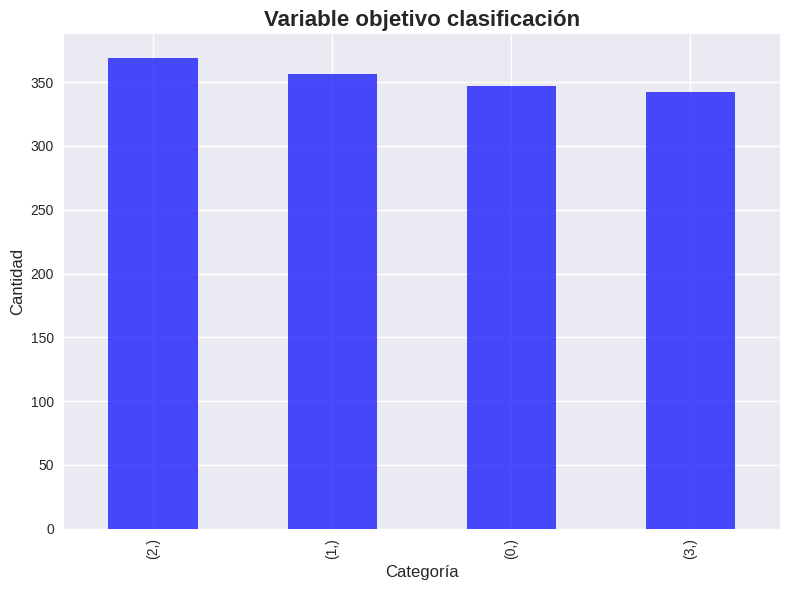

In [ ]:
# Contar la cantidad de cada categoría en la columna "categoria"
conteo_categorias = y_train.value_counts()
# Configurar el estilo y tamaño del gráfico
plt.style.use('seaborn')
plt.figure(figsize=(8, 6))
# Generar el gráfico de barras
conteo_categorias.plot(kind='bar', color='blue', alpha=0.7)
# Configurar el título y etiquetas del gráfico
plt.title('Variable objetivo clasificación', fontsize=16, fontweight='bold')
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

##6 Random Forest

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [ ]:
#Parametros elegidos
param_grid = {
    'n_estimators': [500],
    'max_depth': [20],
    'criterion': ['entropy'],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'max_features': ['auto'],
    'bootstrap': [False]
}

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Mean CV ROC AUC: 0.9704885070715672


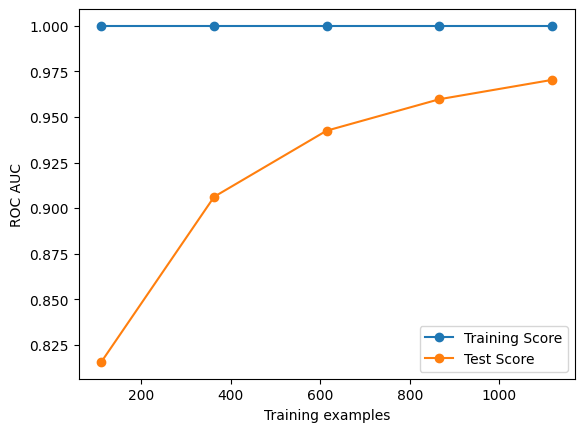

<ipython-input-47-58eecc4c9ce0>:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
#Entrenamiento del modelo
model, accuracy, roc_auc, conf_matrix, best_params=train_and_evaluate_model(X_train, X_test, y_train, y_test, 'random_forest', param_grid, random_state=13)


In [ ]:
importance = model.feature_importances_
feature_names = X_train.columns

# Crear un DataFrame para visualizar las características más importantes
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
feature_importance_df


,Feature,Importance
1496,Componente_Principal_1140,0.042186
1494,Componente_Principal_1137,0.007898
1497,Componente_Principal_1141,0.007686
1085,OT_Porcentaje_avaluo_catastral_urbano,0.006845
1084,OT_Porcentaje_avaluo_catastral_rural,0.006351
...,...,...
554,Ambiente_porcentaje_area_total_ecosistemas,0.000000
553,Ambiente_porcentaje_area_sinap,0.000000
552,Ambiente_porcentaje_area_seco,0.000000
1035,Justicia_otros_area_derecho_no_definida,0.000000


In [ ]:
resultado_evaluacion,conf_matrix  = evaluate_model(model, X_val, y_val)
resultado_evaluacion

,Accuracy,ROC_AUC
0,0.588235,0.782669


In [ ]:
conf_matrix

array([[  3,   1,  34,   1],
       [  0,  18,  32,   1],
       [  1,   9, 102,   1],
       [  3,   1,   7,   7]])

##7 Resultados del modelo XG_BOOST

In [ ]:
#Parametos porbados
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]}

In [ ]:
#Parametros elegidos
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [200],
    'max_depth': [7],
    'min_child_weight': [5],
    'subsample': [0.9],
    'colsample_bytree': [0.9],
    'gamma': [0.1],
    'reg_alpha': [0],
    'reg_lambda': [1]}

Mean CV ROC AUC: 0.9697668014500904


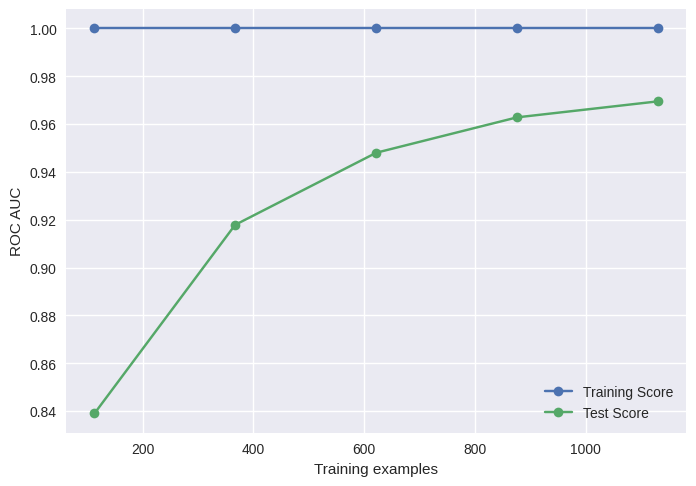

In [ ]:
#Entrenamiento del modelo
model, accuracy, roc_auc, conf_matrix, best_params=train_and_evaluate_model(X_train, X_test, y_train, y_test, 'xgboost', param_grid, random_state=13)



In [ ]:
resultado_evaluacion,conf_matrix  = evaluate_model(model, X_val, y_val)
resultado_evaluacion

,Accuracy,ROC_AUC
0,0.651584,0.847717


In [ ]:
conf_matrix

array([[26,  0, 14,  4],
       [ 1, 34, 17,  0],
       [12, 18, 74,  4],
       [ 4,  1,  2, 10]])

In [ ]:
# Obtener la importancia de las variables
importances = model.feature_importances_

# Crear el DataFrame de importancia de variables
importance_df = pd.DataFrame({'Variable': X_train.columns, 'Importance': importances})

# Ordenar el DataFrame por importancia descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/Variables_Importantes_XGBoost_Classificacion.csv'
importance_df.to_csv(ruta_archivo, index=False)

# Imprimir el DataFrame
importance_df.head()

,Variable,Importance
0,Componente_Principal_1140,0.012424
517,seg_fluvial_Incautaciones_ClorhidratoCocaina,0.011284
62,Componente_Principal_1367,0.009950
7,salud_PorcNacVivosMadres1826,0.009263
205,Educacion_Cobertura_Neta_Transición.10,0.007930


##8 Generación de la Recomendación

In [ ]:
Prediccion_Municipios=obtener_clasificacion_y_scores(model,X,Id_Municipio_Dane['Id_Municipio_Dane'])
Prediccion_Municipios=Prediccion_Municipios.merge(Id_Municipio_Dane, left_index=True, right_index=True)
Prediccion_Municipios

,ID,y,Score_0,Score_1,Score_2,Score_3,Id_Municipio_Dane,recomendacion,Y_Objetivo
0,5001,2,0.002028,0.000976,0.995965,0.001031,5001,Media,2
1,5002,2,0.001108,0.027323,0.970958,0.000612,5002,Media,2
2,5004,2,0.046289,0.033502,0.911320,0.008889,5004,Media,2
3,5021,2,0.029629,0.002087,0.966790,0.001495,5021,Media,2
4,5030,2,0.033991,0.001390,0.962044,0.002575,5030,Media,2
...,...,...,...,...,...,...,...,...,...
1096,97666,3,0.003008,0.001703,0.003637,0.991652,97666,Muy alta,3
1097,99001,2,0.020407,0.004838,0.944196,0.030559,99001,Media,2
1098,99524,3,0.180017,0.033510,0.247332,0.539141,99524,Muy alta,3
1099,99624,3,0.003657,0.001889,0.008381,0.986072,99624,Muy alta,3


In [ ]:
ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/Output_Final_casificacion.csv'
Prediccion_Municipios.to_csv(ruta_archivo, index=False)